In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from os import sys
import ss_utils as ut
from matplotlib import colormaps 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Text(0, 0.5, 'Feature 2')

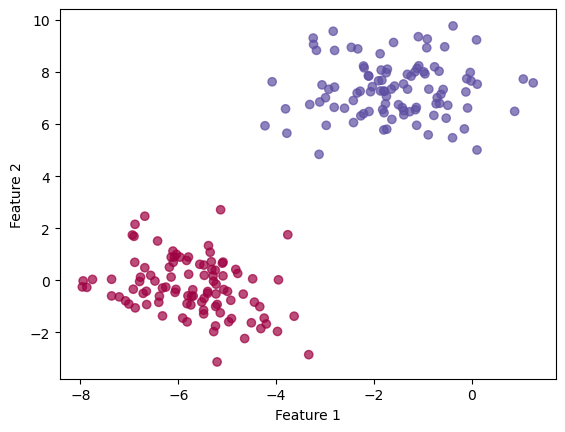

In [2]:
# Load dataset
title =  "binary_blobs"
path = "../datasets/toy/{}.csv".format(title)

# Get the data and its labels
X, y = ut.read_dataset(path, "label")

# Plot dataset
#ut.plot_dataset(X, "f0", "f1", y, title) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X.loc[:, ["f0"]].values, X.loc[:, ["f1"]].values, 
            c=y, cmap='Spectral', marker="o", alpha=0.70)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [3]:
def activation_func(value, threshold):
    return np.where(value > threshold, 1, 0)

class Perceptron:
    
    def __init__(self, lr=0.1, threshold=0, max_iter=10):
        self.lr = lr
        self.threshold = threshold
        self.max_iter = max_iter
        self.weights = None
        
    def fit(self, X, y):
        # Initialize weights
        self.weights = np.zeros(X.shape[1]).reshape(1,-1) 
        for epoch in range(self.max_iter):
            for Xi, yi in zip(X, y):
                yhat = activation_func(self.weights@Xi.T, self.threshold) 
                # yi - yhat = 0 --> don't update
                # yi - yhat = 1 (class 1 classfied as class 0) --> update 
                # yi - yhat = -1 (class 0 classified as 1) --> update 
                # See graphics in https://pantelis.github.io/cs634/docs/common/lectures/classification/perceptron/
                self.weights += self.lr*(yi - yhat)*Xi
    
    def predict(self, X):
        yhat = activation_func(self.weights@X.T, self.threshold)
        return yhat, self.weights

In [4]:
# Split data as train and test
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), 
                                                    test_size=0.2, random_state=123)

# Reshape data (we use wX.T instead of wX.T + b)
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]
y_test = y_test[:, np.newaxis].T

# Run perceptron
percept = Perceptron()
percept.fit(X_train, y_train)
predictions, weights = percept.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("accuracy:", accuracy)

accuracy: 1.0


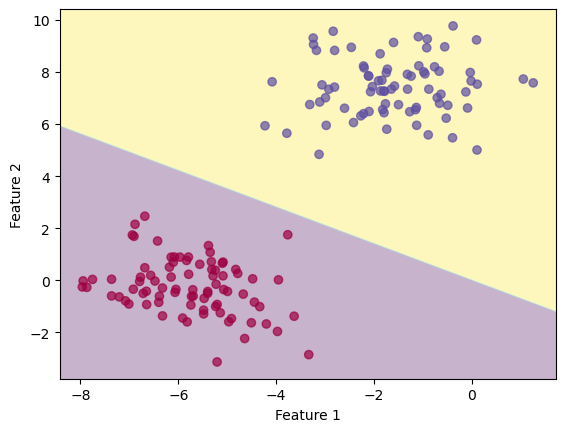

In [5]:
# Plot decision boudary
plt.scatter(X_train[:, 1], X_train[:, 2], 
            c=y_train, cmap='Spectral', marker="o", alpha=0.70)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

#mins = X_train[:,1:].min(axis=0)
#maxs = X_train[:,1:].max(axis=0)

#xmin, xmax = mins[0], maxs[0]
#ymin, ymax = mins[1], maxs[1]
    
#x_min = xmin - np.abs(xmax-xmin)*0.05
#x_max = xmax + np.abs(xmax-xmin)*0.05
#y_min = ymin - np.abs(ymax-ymin)*0.05
#y_max = ymax + np.abs(ymax-ymin)*0.05
    
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()    
    
h = .01 

_x, _y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
grid_points = np.c_[np.ones(np.size(_x)), _x.ravel(), _y.ravel()]
    
grid_predictions, weights = percept.predict(grid_points)
    
grid_predictions = grid_predictions.reshape(_x.shape)
    
plt.imshow(grid_predictions, interpolation="gaussian", 
            alpha=0.3, extent=[x_min, x_max, y_min, y_max], 
            aspect="auto", origin="lower")

plt.show()